# Side chain orientation

Angle/category distribution per KLIFS position.

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from pathlib import Path
import pickle
import sys

import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../..')
from kinsim_structure.auxiliary import KlifsMoleculeLoader, PdbChainLoader, get_klifs_residues_mol2topdb
from kinsim_structure.encoding import SideChainOrientationFeature

_ColormakerRegistry()

In [4]:
pd.set_option('display.max_rows', 1000)

## IO paths

In [5]:
path_to_kinsim = Path('.') / '..' / '..'
path_to_data = path_to_kinsim / 'examples' / 'data'
path_to_results = path_to_kinsim / 'examples' / 'results'

metadata_path = path_to_data / 'postprocessed' / 'klifs_metadata_postprocessed.csv'
sco_path = path_to_results / 'side_chain_orientation' / 'side_chain_orientations.p'

## Load metadata

In [6]:
klifs_metadata = pd.read_csv(metadata_path, index_col=0)
klifs_metadata.head()

,metadata_index,kinase,family,groups,pdb_id,chain,alternate_model,species,ligand_orthosteric_name,ligand_orthosteric_pdb_id,...,ac_helix,rmsd1,rmsd2,qualityscore,pocket,resolution,missing_residues,missing_atoms,full_ifp,code
0,2886,AAK1,NAK,Other,4wsq,B,A,Human,K-252A,KSA,...,in,0.777,2.125,8.6,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.95,0,14,0000000000000010000001000000000000000000000000...,HUMAN/AAK1/4wsq_chainB_altA
1,10043,AAK1,NAK,Other,5l4q,A,A,Human,"~{N}-[5-(4-cyanophenyl)-1~{H}-pyrrolo[2,3-b]py...",LKB,...,in,0.780,2.137,9.7,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.97,0,3,0000000000000010000000000000000000000000000000...,HUMAN/AAK1/5l4q_chainA_altA
2,7046,AAK1,NAK,Other,5te0,A,-,Human,methyl (3Z)-3-{[(4-{methyl[(4-methylpiperazin-...,XIN,...,in,0.776,2.120,8.8,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...,1.90,0,12,1000101000000010000001000000000000000000000000...,HUMAN/AAK1/5te0_chainA
3,843,ABL1,Abl,TK,2f4j,A,-,Human,CYCLOPROPANECARBOXYLIC ACID {4-[4-(4-METHYL-PI...,VX6,...,in,0.779,2.128,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.91,0,0,0000000000000010000001000000000000000000000000...,HUMAN/ABL1/2f4j_chainA
4,815,ABL1,Abl,TK,2g1t,A,-,Human,-,-,...,out,0.825,2.154,8.0,HKLGGGQYGEVYEVAVKTLEFLKEAAVMKEIKPNLVQLLGVYIITE...,1.80,0,0,NaN,HUMAN/ABL1/2g1t_chainA


In [7]:
klifs_metadata_entry = klifs_metadata[klifs_metadata.pdb_id=='5i35'].squeeze()

In [8]:
klifs_metadata_entry

metadata_index                                                            8061
kinase                                                                   ADCK3
family                                                                    ABC1
groups                                                                Atypical
pdb_id                                                                    5i35
chain                                                                        A
alternate_model                                                              -
species                                                                  Human
ligand_orthosteric_name            PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER
ligand_orthosteric_pdb_id                                                  ANP
ligand_allosteric_name                                                       -
ligand_allosteric_pdb_id                                                     -
dfg                                                 

## Load molecule with non-standard residue(s)

In [9]:
klifs_molecule_loader = KlifsMoleculeLoader(klifs_metadata_entry=klifs_metadata_entry)
pdb_chain_loader = PdbChainLoader(klifs_metadata_entry=klifs_metadata_entry)

## Side chain orientation

In [10]:
with open(sco_path, 'rb') as f:
    sco_data = pickle.load(f)

In [11]:
sco_list = []

for key, value in sco_data.data.items():
    
    sco = value.features_verbose
    sco['molecule_code'] = key
    sco_list.append(sco)
    
sco_df = pd.concat(sco_list, sort=False)

In [12]:
sco_df.reset_index(inplace=True, drop=True)

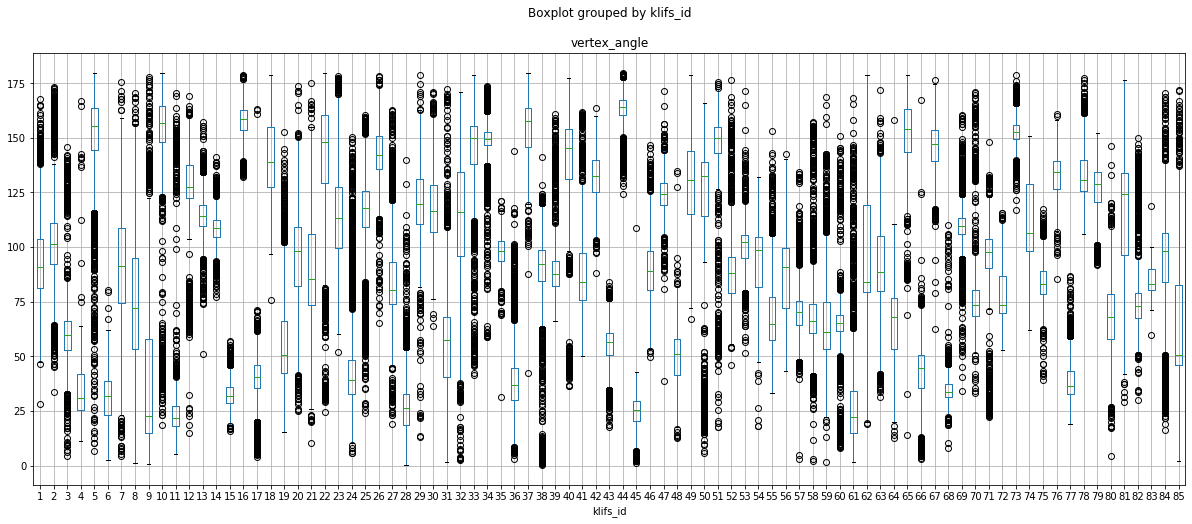

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
plt.suptitle('')

sco_df.boxplot(column='vertex_angle',by='klifs_id', ax=ax)

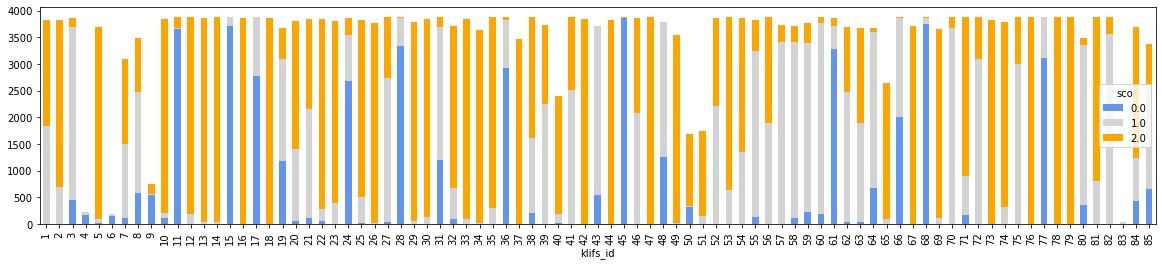

In [14]:
fig, ax = plt.subplots(figsize=(20,4))
plt.suptitle('')

sco_df.groupby(['klifs_id', 'sco']).size().unstack().plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    color=['cornflowerblue', 'lightgrey', 'orange']
)

In [15]:
sequence = pd.DataFrame([list(i) for i in klifs_metadata.pocket], columns=range(1,86))

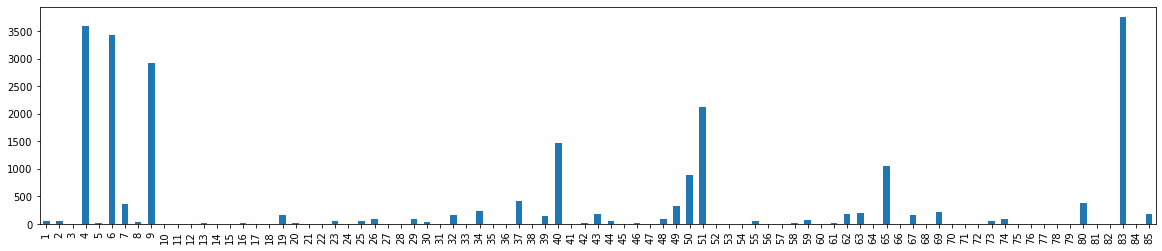

In [16]:
fig, ax = plt.subplots(figsize=(20,4))
plt.suptitle('')

sequence.apply(lambda x: x=='G').apply(lambda x: sum(x)).plot(kind='bar', ax=ax)